In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
housing=pd.read_excel("/content/drive/MyDrive/colab data/housing+(1).xlsx")

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


Average of median income: 3.8706710029069766


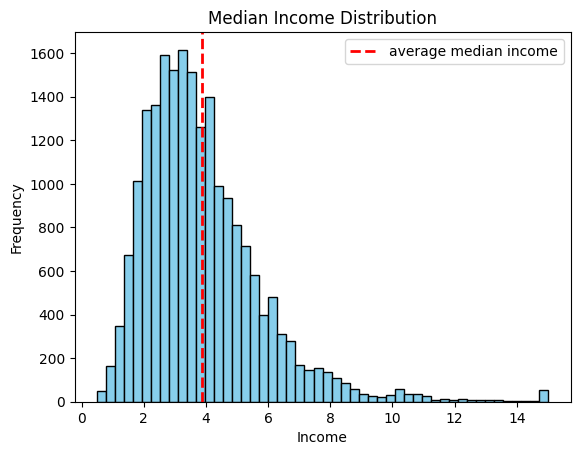

In [ ]:
#1. What is the average median income of the data set and check the distribution of data using appropriate plots.
#Please explain the distribution of the plot.


#average of median incocme
mean=housing['median_income'].mean()
print("Average of median income:",mean)

#histogram to visualize the distribution of data
plt.hist(housing['median_income'], bins=50, color='skyblue', edgecolor='black')
plt.title("Median Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.axvline(x=mean,color='red',linestyle='dashed',linewidth=2,label='average median income')
plt.legend()

#Show the plot
plt.show()

As we can see the distribution of income in histogram , the plot is left skewd. the average median income is 3.87.

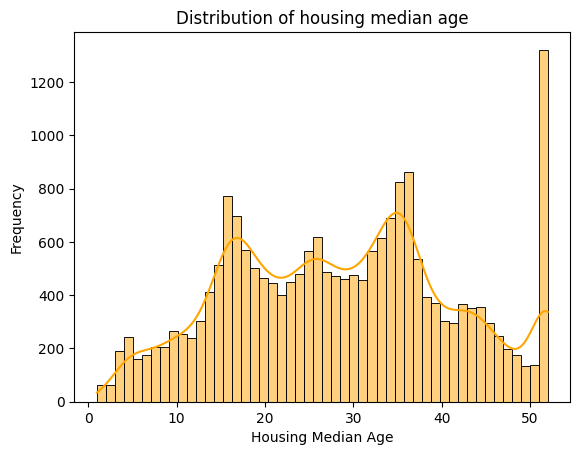

In [ ]:
#2 Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

##histogram to visualize the distribution of data

sns.histplot(housing['housing_median_age'],bins=50,kde='true',color='orange',edgecolor='black')
plt.title("Distribution of housing median age")
plt.xlabel("Housing Median Age")
plt.ylabel("Frequency")

#Show the plot
plt.show()


From the distribution of age in hitogram , we have a multimodal histogram, which has multiple peaks. from the plot we can see that there are more people between 10 to 20, 30 to 40 and another huge peak where the age is above 50.

<function matplotlib.pyplot.show(close=None, block=None)>

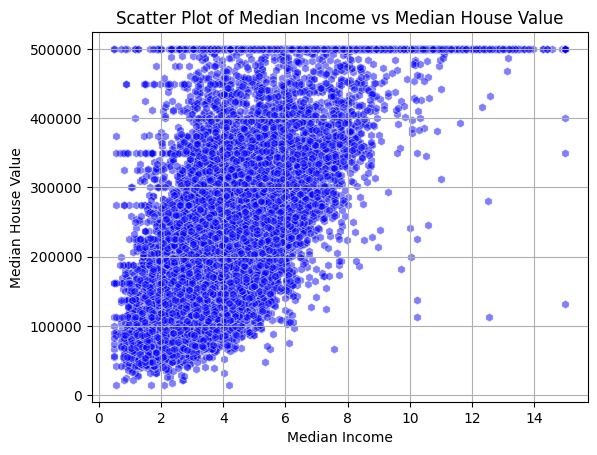

In [ ]:
# 3. Show with the help of visualization, how median_income and median_house_values are related?

# scatter plot visualization of median income and median house values

sns.scatterplot(x='median_income', y='median_house_value', data=housing, alpha=0.5, color='blue',marker="h")
plt.title('Scatter Plot of Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)

#Show the plot
plt.show

To find the correlation between two features i used scatter plot. from the plot we can see there is a good relation between house value and income. if the median income increases the house value also increases.

In [ ]:
#4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available

#finding the count of each colounm in housing data set

#housing.count()

# Creating a new dataset by dropping rows where 'total_bedrooms' is not available

new_housing_data=housing.dropna(subset=['total_bedrooms'])
#print(new_housing_data)
new_housing_data.count()

longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           20433
total_bedrooms        20433
population            20433
households            20433
median_income         20433
median_house_value    20433
ocean_proximity       20433
dtype: int64

In [ ]:
#5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

#finding the mean of total bedrooms coloumn
x=housing['total_bedrooms'].mean()
print('Mean value of Total bedroom:',x)

#Replacing null values in total bedroom coloumn to mean value
housing["total_bedrooms"].fillna(x,inplace=True)

#checking if the value is replacce with mean value
print(housing.iloc[290])


#print(housing)

Mean value of Total bedroom: 537.8705525375618
longitude                -122.16
latitude                   37.77
housing_median_age            47
total_rooms                 1256
total_bedrooms        537.870553
population                   570
households                   218
median_income              4.375
median_house_value        161900
ocean_proximity         NEAR BAY
Name: 290, dtype: object


In [ ]:
#6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.


# creating a class
class median_calculator:
  def __init__(self,dataframe):
    self.dataframe=dataframe

  def calculate_m(self,column_name):
    median_value= self.dataframe[column_name].median()
    return median_value


excel_filepath='/content/drive/MyDrive/colab data/housing+(1).xlsx'
column='households'

# Read the data from Excel into a DataFrame
df=pd.read_excel(excel_filepath)

# Create an instance of the median_calculator class
median_data=median_calculator(df)

# Calculate the median for the specified column
median_result=median_data.calculate_m(column)

#printing median
print("The median value of the dataset is:",median_result)

The median value of the dataset is: 409.0


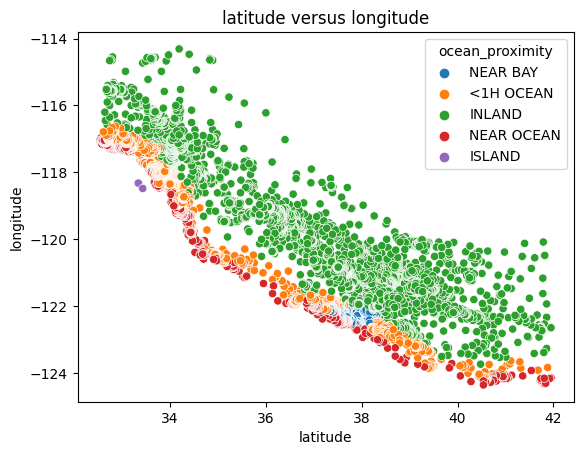

In [ ]:
#7. Plot latitude versus longitude and explain your observations.

#scatterplot to visualize the data
sns.scatterplot(x='latitude',y='longitude',data=housing,color='yellow',hue='ocean_proximity')
plt.title('latitude versus longitude')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

In [ ]:
#10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less,
#it should be quoted as small. If the total bedrooms is 11 or more but less than 1000,
#it should be medium, otherwise it should be considered large.

#assigning a dataframe ddd
ddd=pd.DataFrame(housing)
ddd['bedroom_size']='other'
#print(ddd)

#assigning range values
lower_limit=10
upper_limit=1000

#assigning range values to conditions
conditions = [
    (ddd['total_bedrooms'] < lower_limit),
    (ddd['total_bedrooms'] >= lower_limit) & (df['total_bedrooms'] <= upper_limit),
    (ddd['total_bedrooms'] > upper_limit)
]

#values for each condition
values = ['small', 'medium', 'large']

ddd['bedroom_size']=np.select(conditions,values,default='Other')

# Display the DataFrame with the new column
print(ddd)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media